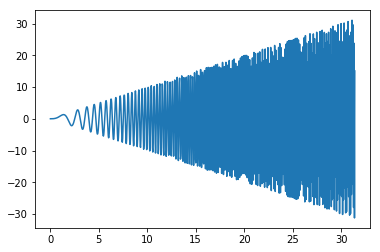

In [80]:
import matplotlib.pyplot as plt
import numpy as np
t=np.linspace(0,np.pi*10,1000)
E=t*np.sin(t**2)
plt.plot(t,E)
plt.show()

In [81]:
import sympy as sy
 
def differential_equation(x,f):
    return sy.diff(f(x),x,2)+f(x)#f(x)''+f(x)=0 二阶常系数齐次微分方程
x=sy.symbols('x')#约定变量
f=sy.Function('f')#约定函数
print(sy.dsolve(differential_equation(x,f),f(x)))#打印
sy.pprint(sy.dsolve(differential_equation(x,f),f(x)))#漂亮的打印

Eq(f(x), C1*sin(x) + C2*cos(x))
f(x) = C₁⋅sin(x) + C₂⋅cos(x)


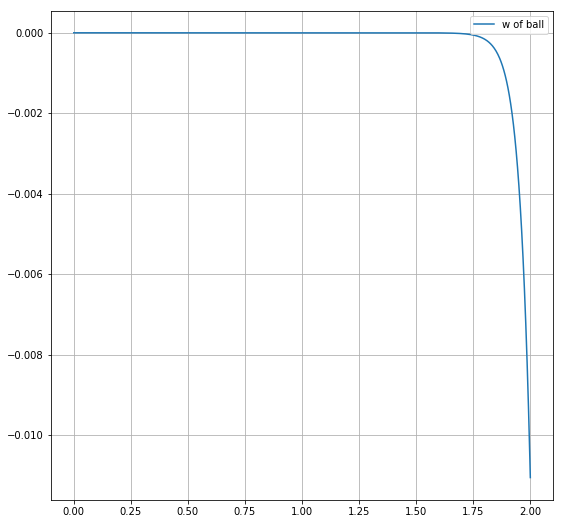

In [82]:
import numpy as np
from scipy.integrate import odeint
#二阶微分方程

def diff_equation(o_list,x):
    #
    '''
    theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0

where `b` and `c` are positive constants, and a prime (') denotes a
derivative.  To solve this equation with `odeint`, we must first convert
it to a system of first order equations.  By defining the angular
velocity ``omega(t) = theta'(t)``, we obtain the system::

    theta'(t) = omega(t)
    omega'(t) = -b*omega(t) - c*sin(theta(t))

Let `y` be the vector [`theta`, `omega`].  We implement this system
in python as:

>>> def pend(y, t, b, c):
...     theta, omega = y
...     dydt = [omega, -b*omega - c*np.sin(theta)]
...     return dydt
...
    '''
    #y''+y=0 二阶的话，要换成两个一阶微分方程的方程组
    #设y'=z
    #那么z'=y''=-y
    #手工解也很容易知道是 y=C1sin(x)+C2cos(x)
    o,o1=o_list
    a=m*m*R*R*np.cos(o)*np.cos(o)-(M+m)*(m*R*R+I)
    b=cm*(M+m)
    c=m*m*R*R*np.sin(o)*np.cos(o)
    d=F*np.cos(o)*m*R*np.cos(o)
    d=F*np.cos(w*x)*m*R*np.cos(o)
    dodt=[o1,(c*o1*o1-d)/a]
    #dodt=[o1,(b*o1-d)/a]
    #dodt=[o1,(b*o1+c*o1*o1-d)/a]
    return dodt
m=0.1
M=1.5
R=0.013
r=0.005
I=0.4*m*r**2
cm=0.02
f=1/4
F=10
w=2*np.pi*f
x=np.linspace(0,2,1000)
y0=[np.pi/2,0]#theta(0)=pi/2,theta'(0)=0
result=odeint(diff_equation,y0,x)
plt.figure(figsize=(9,9))
#plt.plot(x,result[:,0],label='angle')#y的图像，y=cos(x)+sin(x)
plt.plot(x,result[:,1],label='w of ball')
#plt.plot(x[250:300],10*result[250:300:,1],label='W')#z的图像，也就是y'的图像，z=-sin(x)+cos(x)
#plt.plot(x,-100*np.cos(w*x),label='Force')
#plt.plot(x[250:300],-np.sin(w*x)[250:300],label='F')

plt.legend()
plt.grid()
plt.show()

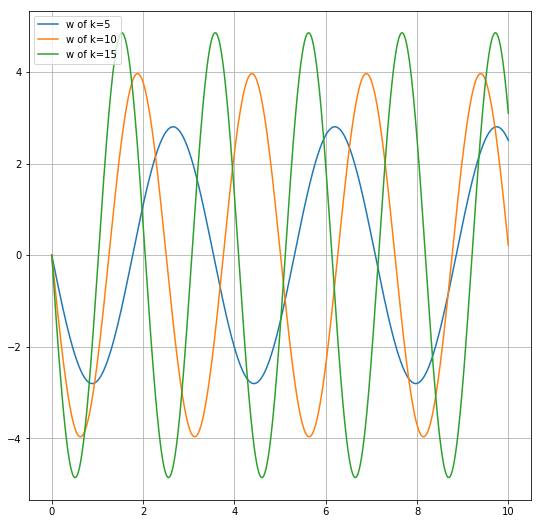

In [83]:
import numpy as np
from scipy.integrate import odeint
#二阶微分方程

def diff_equation(o_list,x):
    #
    '''
    theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0

where `b` and `c` are positive constants, and a prime (') denotes a
derivative.  To solve this equation with `odeint`, we must first convert
it to a system of first order equations.  By defining the angular
velocity ``omega(t) = theta'(t)``, we obtain the system::

    theta'(t) = omega(t)
    omega'(t) = -b*omega(t) - c*sin(theta(t))

Let `y` be the vector [`theta`, `omega`].  We implement this system
in python as:

>>> def pend(y, t, b, c):
...     theta, omega = y
...     dydt = [omega, -b*omega - c*np.sin(theta)]
...     return dydt
...
    '''
    #y''+y=0 二阶的话，要换成两个一阶微分方程的方程组
    #设y'=z
    #那么z'=y''=-y
    #手工解也很容易知道是 y=C1sin(x)+C2cos(x)
    
    o,o1=o_list
    
    a=m*m*R*R*np.cos(o)*np.cos(o)-(M+m)*(m*R*R+I)
    b=cm*(M+m)
    c=m*m*R*R*np.sin(o)*np.cos(o)
    #d=k*A*np.cos(o)*m*R*np.cos(o)
    d=k*(m*R*R+I)
    
    dodt=[o1,d*o/a]
    #dodt=[o1,(b*o1-d)/a]
    #dodt=[o1,(b*o1+c*o1*o1-d)/a]
    return dodt
m=0.1
M=1.5
R=0.013
r=0.005
I=0.4*m*r**2
cm=0.02
f=5
#k=10
A=10
w=2*np.pi*f
x=np.linspace(0,10,1000)
y0=[np.pi/2,0]#theta(0)=pi/2,theta'(0)=0
plt.figure(figsize=(9,9))
for k in range(5,20,5):
    result=odeint(diff_equation,y0,x)

#plt.plot(x,result[:,0],label='angle')#y的图像，y=cos(x)+sin(x)
    plt.plot(x,result[:,1],label='w of k=%s' %k)
#plt.plot(x[250:300],10*result[250:300:,1],label='W')#z的图像，也就是y'的图像，z=-sin(x)+cos(x)
#plt.plot(x,-100*np.cos(w*x),label='Force')
#plt.plot(x[250:300],-np.sin(w*x)[250:300],label='F')


plt.legend()
plt.grid()
plt.show()

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

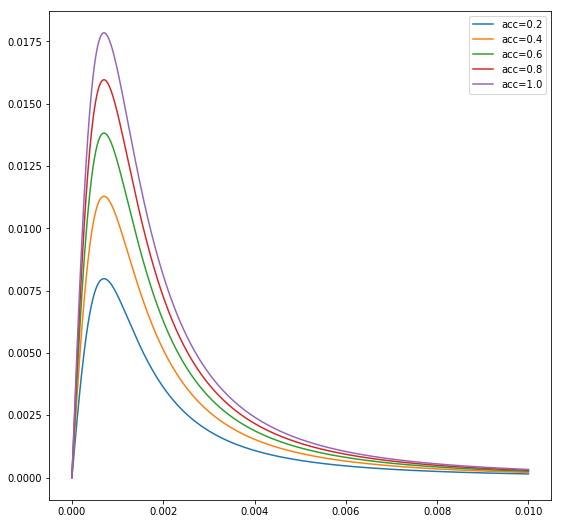

In [156]:
import numpy as np
import matplotlib.pyplot as plt
Br=1;
N=600;
S=3.14*0.005*0.005;
d=0.005;
R=0.001;
a=0.2
X=0.01001
dt=0.00001
Bv1=[]
Bv2=[]
Bv3=[]
Bv4=[]
Bv5=[]

a=0.2
x=np.linspace(0,X,1001)
t=2*x/(a)**0.5
Bz=Br/2*((x+d)/((x+d)**2+R**2)**0.5-x/(x**2+R**2)**0.5)
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')

for i in range(1000):
    k=-(Bz[i+1]-Bz[i])/dt
    l=a*t[i]
    bv=N*S*k*l
    Bv1.append(bv)

a=0.4
x=np.linspace(0,X,1001)
t=2*x/(a)**0.5
Bz=Br/2*((x+d)/((x+d)**2+R**2)**0.5-x/(x**2+R**2)**0.5)
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')

for i in range(1000):
    k=-(Bz[i+1]-Bz[i])/dt
    l=a*t[i]
    bv=N*S*k*l
    Bv2.append(bv)
    
a=0.6
x=np.linspace(0,X,1001)
t=2*x/(a)**0.5
Bz=Br/2*((x+d)/((x+d)**2+R**2)**0.5-x/(x**2+R**2)**0.5)
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')

for i in range(1000):
    k=-(Bz[i+1]-Bz[i])/dt
    l=a*t[i]
    bv=N*S*k*l
    Bv3.append(bv)
    
    
a=0.8
x=np.linspace(0,X,1001)
t=2*x/(a)**0.5
Bz=Br/2*((x+d)/((x+d)**2+R**2)**0.5-x/(x**2+R**2)**0.5)
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')

for i in range(1000):
    k=-(Bz[i+1]-Bz[i])/dt
    l=a*t[i]
    bv=N*S*k*l
    Bv4.append(bv)
    
a=1
x=np.linspace(0,X,1001)
t=2*x/(a)**0.5
Bz=Br/2*((x+d)/((x+d)**2+R**2)**0.5-x/(x**2+R**2)**0.5)
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')

for i in range(1000):
    k=-(Bz[i+1]-Bz[i])/dt
    l=a*t[i]
    bv=N*S*k*l
    Bv5.append(bv)
    
plt.plot(x[:-1],Bv1,label='acc=0.2' )
plt.plot(x[:-1],Bv2,label='acc=0.4' )
plt.plot(x[:-1],Bv3,label='acc=0.6' )
plt.plot(x[:-1],Bv4,label='acc=0.8' )
plt.plot(x[:-1],Bv5,label='acc=1.0' )

plt.legend()
#plt.grid()
plt.show()

[0.         0.00100012 0.00141439 0.00173227 0.00200025 0.00223635
 0.0024498  0.00264608 0.00282878 0.00300037]
4001
[0.0, 0.04676240090996236, 0.06613191117739341, 0.08099433862867784, 0.09352348401544848, 0.1045613096703575, 0.1145395976750992, 0.12371482623365947, 0.13225408944055797, 0.1402734386415043]
[0.         0.00100006 0.0014143  0.00173216 0.00200012 0.00223621
 0.00244964 0.00264592 0.0028286  0.00300019]
8001
[0.0, 0.046753635427932094, 0.06611951499832588, 0.0809791566827078, 0.09350595378141395, 0.10454171082178398, 0.11451812896507307, 0.12369163835347602, 0.1322293017733811, 0.14024714882913755]
[0.         0.00100003 0.00141426 0.0017321  0.00200006 0.00223614
 0.00244957 0.00264583 0.00282852 0.00300009]
16001
[0.0, 0.0467492528923315, 0.06611331719926278, 0.08097156606544437, 0.09349718907509275, 0.1045319118566135, 0.11450739511287868, 0.1236800449563985, 0.1322169085201427, 0.1402340045383198]


<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

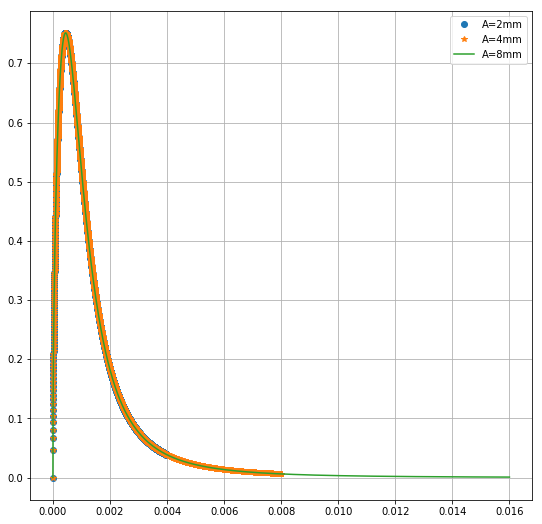

In [154]:
import numpy as np
import matplotlib.pyplot as plt
Br=1;
N=600;
S=3.14*0.005*0.005;
d=0.005;
R=0.001;
a=2
X1=0.004001
X2=0.008001
X3=0.016001
Bv1=[]
Bv2=[]
Bv3=[]



x1=np.linspace(0,X1,4001)
t1=(2*x1/a)**0.5
Bz1=Br/2*((x1+d)/((x1+d)**2+R**2)**0.5-x1/(x1**2+R**2)**0.5)
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')

for i in range(4000):
    k=-(Bz1[i+1]-Bz1[i])/0.000001
    l=a*t1[i]
    bv=N*S*k*l
    Bv1.append(bv)
print(t1[:10])
print(len(t1))
print(Bv1[:10])
#plt.plot(x1[:-1],Bv1,label='A=2mm' )

x2=np.linspace(0,X2,8001)
t2=(2*x2/a)**0.5
Bz2=Br/2*((x2+d)/((x2+d)**2+R**2)**0.5-x2/(x2**2+R**2)**0.5)
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')

for i in range(8000):
    k=-(Bz2[i+1]-Bz2[i])/0.000001
    l=a*t2[i]
    bv=N*S*k*l
    Bv2.append(bv)
print(t2[:10])
print(len(t2))
print(Bv2[:10])    
#plt.plot(x2[:-1],Bv2,label='A=4mm' )

x3=np.linspace(0,X3,16001)
t3=(2*x3/a)**0.5
Bz3=Br/2*((x3+d)/((x3+d)**2+R**2)**0.5-x3/(x3**2+R**2)**0.5)
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')

for i in range(16000):
    k=-(Bz3[i+1]-Bz3[i])/0.000001
    l=a*t3[i]
    bv=N*S*k*l
    Bv3.append(bv)
print(t3[:10])
print(len(t3))
print(Bv3[:10])   

plt.plot(x1[:-1],Bv1,'o',label='A=2mm' )
plt.plot(x2[:-1],Bv2,'*',label='A=4mm' )
plt.plot(x3[:-1],Bv3,label='A=8mm' )

plt.legend()
plt.grid()
plt.show()

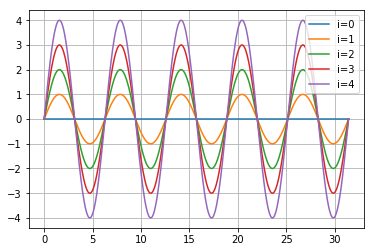

In [95]:
import numpy as np
import matplotlib.pyplot as plt
Br=0.1;
N=100;
S=3.14*0.005*0.005;
d=0.005;
R=0.005;
a=0.2

x=np.linspace(0,10*np.pi,1000)
for i in range(5):
    y=i*np.sin(x)
    plt.plot(x,y,label='i=%s' %i)
plt.legend()
plt.grid()
plt.show()

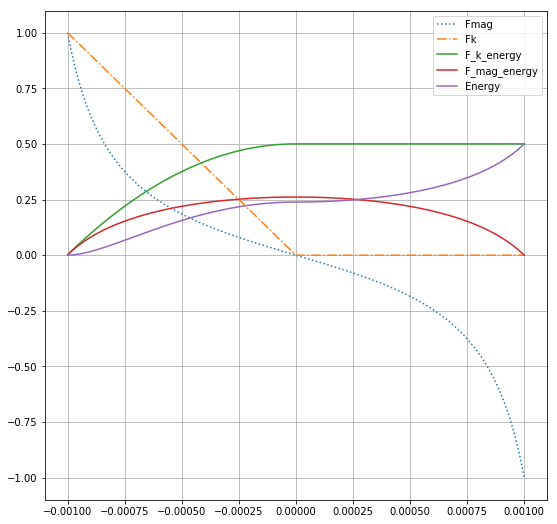

In [43]:
import numpy as np
import matplotlib.pyplot as plt
Br=0.1;
N=1000;
R=0.01;  #磁铁半径
S=3.14*R*R; #磁铁的面积
d=0.01; #磁铁厚度
a=0.001 #位移比例
b=1 #位移比例
F_0=1 #弹簧初始力
c=5 #导磁参数
k=1 #弹性系数
dt=0.00006

t=np.linspace(-0.03,0.03006,1001)
x=np.cos(2*np.pi*50*t)
B1=Br/2*((a*(1-x)+d)/((a*(1-x)+d)**2+R**2)**0.5-a*(1-x)/(a*(1-x)**2+R**2)**0.5)
B2=Br/2*((a*(x+1)+d)/((a*(x+1)+d)**2+R**2)**0.5-a*(x+1)/(a*(x+1)**2+R**2)**0.5)
B=B1-B2

#print(np.linspace(-1,1,1000))
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')
V=[]
for i in range(1000):
    dB=(B[i+1]-B[i])
    if abs(dB/dt)<0.3:
        dB=0.1*dB
    elif abs(dB/dt)<0.6:
        dB=0.4*dB
    elif abs(dB/dt)<0.9:
        dB=0.7*dB
    elif abs(dB/dt)<1.2:
        dB=dB
    elif abs(dB/dt)<1.5:
        dB=1.5*dB
    elif abs(dB/dt)<1.8:
        dB=2*dB
    elif abs(dB/dt)<2.0:
        dB=2.5*dB
    else:
        dB=3*dB
    v=S*dB/dt
    V.append(v)

    
F_mag=[]
F_mag_energy=[0]
F_k=[]
F_k_energy=[0]
Energy=[0]
for i in np.linspace(-1,1,1000):
    f_mag=-11/10*F_0*(1/(1+c*b*(1-i))-1/(1+c*b*(1+i)))
    F_mag.append(f_mag)
    F_mag_energy.append(f_mag*0.002+F_mag_energy[-1])
    if i<0:
        f_k=F_0-k*(1+i)
        F_k.append(f_k)
        F_k_energy.append(f_k*0.002+F_k_energy[-1])
    else:
        f_k=0
        F_k.append(f_k)
        F_k_energy.append(f_k*0.002+F_k_energy[-1])
    
    #f_k=F_0-k*(1+i)
    #F_k.append(f_k)
    energy=Energy[-1]+(f_k-f_mag)*0.002
    #print(energy)
    Energy.append(energy)
del Energy[0]
del F_k_energy[0]
del F_mag_energy[0]
#plt.plot(t,3*B,label='B')
plt.plot(0.001*np.linspace(-1,1,1000),F_mag,':',label='Fmag')
plt.plot(0.001*np.linspace(-1,1,1000),F_k,'-.',label='Fk')
plt.plot(0.001*np.linspace(-1,1,1000),F_k_energy,label='F_k_energy')
plt.plot(0.001*np.linspace(-1,1,1000),F_mag_energy,label='F_mag_energy')
plt.plot(0.001*np.linspace(-1,1,1000),Energy,label='Energy')
#plt.plot(t[:-1],V,label='V')
plt.legend()
plt.grid()
plt.show()

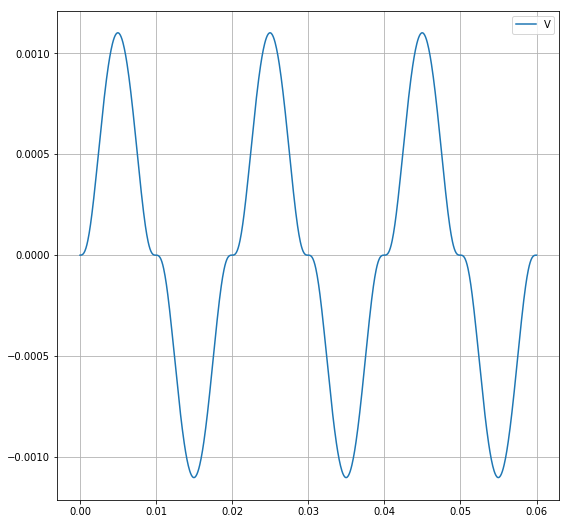

In [32]:
import numpy as np
import matplotlib.pyplot as plt
Br=0.1;
N=1000;
R=0.01;  #磁铁半径
S=3.14*R*R; #磁铁的面积
d=0.01; #磁铁厚度
a=0.001 #位移比例
b=1 #位移比例
F_0=1 #弹簧初始力
c=5 #导磁参数
k=1 #弹性系数
dt=0.00006

X=[]
X_der=[]
F_k=[]
F_mag=[]
V=[0]
for i in np.linspace(0,0.06,1000):
    x=np.cos(2*np.pi*50*i)
    x_deriva=-2*np.pi*50*np.cos(2*np.pi*50*i)
    X.append(x)
    X_der.append(x_deriva)
    f_k=F_0-k*(1-x)
    #print(f_k)
    F_k.append(f_k)
    f_mag=11/10*F_0*(1/(1+c*b*(1-x))-1/(1+c*b*(1+x)))
    F_mag.append(f_mag)
    v=V[-1]+(f_k-f_mag)*0.00006
    V.append(v)
del V[0]


#print(np.linspace(-1,1,1000))
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')


#plt.plot(np.linspace(0,0.06,1000),F_k,label='Fk')
#plt.plot(np.linspace(0,0.06,1000),F_mag,label='Fmag')
#plt.plot(np.linspace(0,0.06,1000),X_der,label='Xderivation')
plt.plot(np.linspace(0,0.06,1000),V,label='V')

plt.legend()
plt.grid()
plt.show()

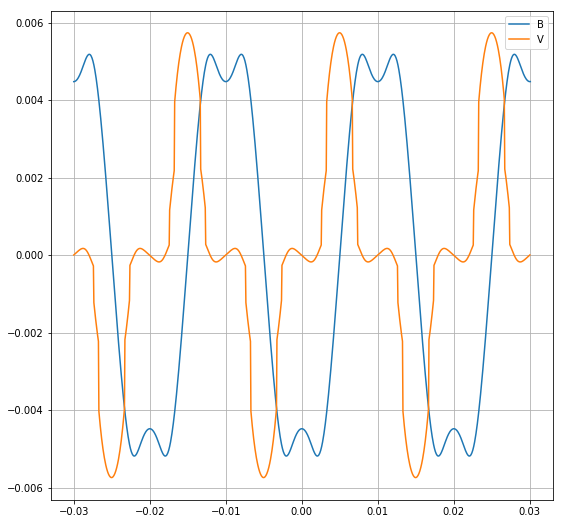

In [3]:
import numpy as np
import matplotlib.pyplot as plt
Br=0.1;
N=1000;
R=0.01;  #磁铁半径
S=3.14*R*R; #磁铁的面积
d=0.01; #磁铁厚度
a=0.001 #位移比例
b=1 #位移比例
F_0=1 #弹簧初始力
c=5 #导磁参数
k=1 #弹性系数
dt=0.00006

t=np.linspace(-0.03,0.03006,1001)
x=np.cos(2*np.pi*50*t)
B1=Br/2*((a*(1-x)+d)/((a*(1-x)+d)**2+R**2)**0.5-a*(1-x)/(a*(1-x)**2+R**2)**0.5)
B2=Br/2*((a*(x+1)+d)/((a*(x+1)+d)**2+R**2)**0.5-a*(x+1)/(a*(x+1)**2+R**2)**0.5)
B=B1-B2

#print(np.linspace(-1,1,1000))
plt.figure(figsize=(9,9))
#plt.plot(x,Bz,label='dB/dt')
V=[]
for i in range(1000):
    dB=(B[i+1]-B[i])
    if abs(dB/dt)<0.3:
        dB=0.1*dB
    elif abs(dB/dt)<0.6:
        dB=0.4*dB
    elif abs(dB/dt)<0.9:
        dB=0.7*dB
    elif abs(dB/dt)<1.2:
        dB=dB
    elif abs(dB/dt)<1.5:
        dB=1.5*dB
    elif abs(dB/dt)<1.8:
        dB=2*dB
    elif abs(dB/dt)<2.0:
        dB=2.5*dB
    else:
        dB=3*dB
    v=30*S*dB/dt
    V.append(v)

    
F_mag=[]
F_k=[]
Energy=[0]
for i in np.linspace(-1,1,1000):
    f_mag=-11/10*F_0*(1/(1+c*b*(1-i))-1/(1+c*b*(1+i)))
    F_mag.append(f_mag)
    if i<0:
        f_k=F_0-k*(1+i)
        F_k.append(f_k)
    else:
        f_k=0
        F_k.append(f_k)
    energy=Energy[-1]+(f_k-f_mag)*0.002
    #print(energy)
    Energy.append(energy)
del Energy[0]
plt.plot(t,3*B,label='B')
'''
plt.plot(0.001*np.linspace(-1,1,1000),F_mag,label='Fmag')
plt.plot(0.001*np.linspace(-1,1,1000),F_k,label='Fk')
plt.plot(0.001*np.linspace(-1,1,1000),Energy,label='Energy')
'''
plt.plot(t[:-1],V,label='V')
plt.legend()
plt.grid()
plt.show()